#Credit Risk Scorecard
#Data cleaning & Risk Safe Feature Preparation
#Objective: Prepare the dataset for credit risk modelling while ensuring regulatory awareness,data integrity and prevention of leakages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [25]:
df = pd.read_csv("credit_default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
df = df.rename(columns={
    'default_payment_next_month': 'default',
    'PAY_0': 'repayment_status_sept',
    'PAY_2': 'repayment_status_aug',
    'PAY_3': 'repayment_status_jul',
    'LIMIT_BAL': 'credit_limit'
})


In [27]:
#Column names standardizied for consistency when modelling and audit traceability

03. Clean Repayment Status Variables

In [28]:
df['repayment_status_sept'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [29]:
# -1, 0 indicates no deliquency.Positive values indicate months past due

In [30]:
#Create a clean deliquency indicator
df['delinquent_sept'] = df['repayment_status_sept'].apply(lambda x: 1 if x > 0 else 0)


04.Handle Outliers in Credit Limit


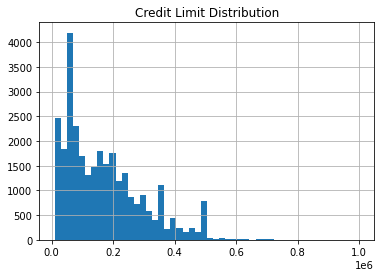

In [31]:
df['credit_limit'].hist(bins=50)
plt.title("Credit Limit Distribution")
plt.show()

In [32]:
#Winsorization
upper_limit = df['credit_limit'].quantile(0.99)

df['credit_limit_capped'] = np.where(
    df['credit_limit'] > upper_limit,
    upper_limit,
    df['credit_limit']
)


In [33]:
#Credit limits which are extreme capped at 99th percentile
#to prevent undue influence on model coefficients

05.Remov impossible values


In [34]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [35]:
#Observations below legal lending age excluded


06.Feature Selection

In [41]:
#Create modelling dataset

model_df = df[[
    'credit_limit_capped',
    'AGE',
    'delinquent_sept',
    'default.payment.next.month'
]]


In [42]:
from sklearn.model_selection import train_test_split

X = model_df.drop('default.payment.next.month', axis=1)
y = model_df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
# Data split into training and test sets to evaluate
# generalization performance and reduce overfitting risk.
